In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Reading the dataset

In [3]:
df = pd.read_csv("./dataset/diabetes.csv")

# Exploratory Data analyis

In [4]:
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

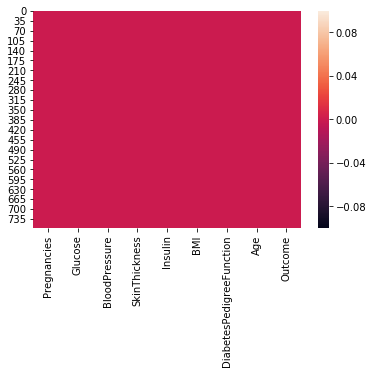

In [6]:
#  null value heat map
sns.heatmap(df.isnull())

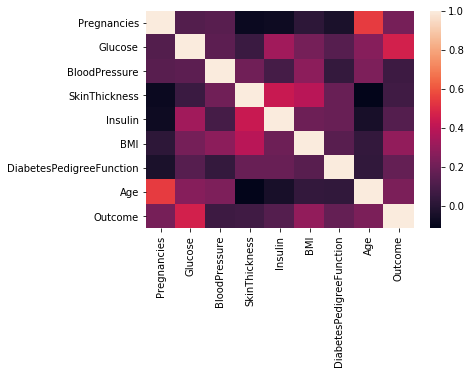

In [7]:
#  correlation heatmap
sns.heatmap(df.corr())

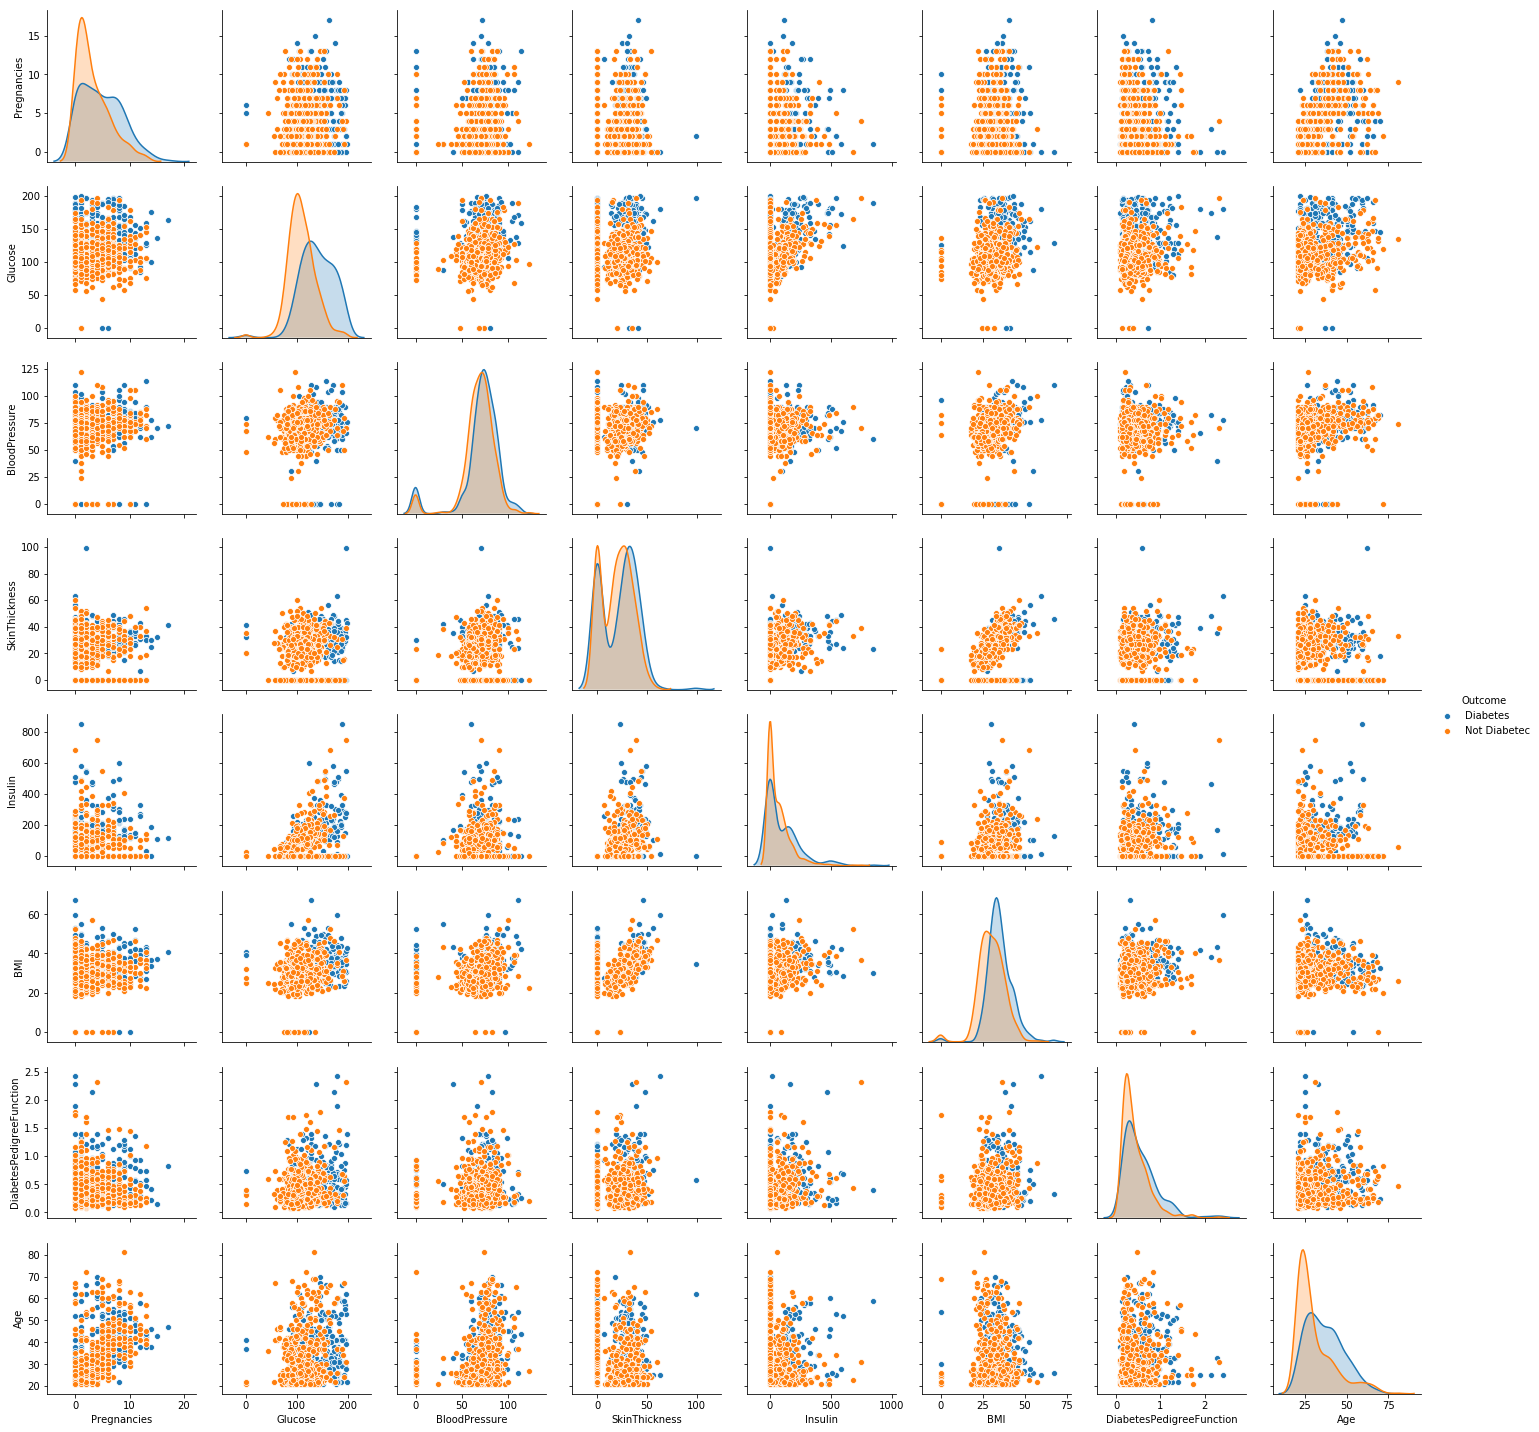

In [8]:
df["Outcome"] = np.where(df["Outcome"] == 1, "Diabetes", "Not Diabetec")
# pair plot to see how each variable is related to people with and without diabtes
sns.pairplot(df, hue = "Outcome")
df = pd.read_csv("./dataset/diabetes.csv")

# Train test spilt

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df.drop(["Outcome"]
                                                            , axis = 1)), 
                                                   np.array(df["Outcome"]),
                                                   random_state = 0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [11]:
# importing pytorch libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

# Creating tensors

In [15]:
# prepraing the dataset
X_train = torch. FloatTensor(X_train)
X_test  = torch.FloatTensor(X_test)
y_train  = torch.LongTensor(y_train)
y_test  = torch.FloatTensor(y_test)

In [19]:
# creating model woth torch
#  nn.Module is the parent  class
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [20]:
############## intatiating the model ##############
# SEEDING WEIGHTS MAUALLY
torch.manual_seed(20)
model = ANN_Model()

In [21]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [22]:
#####backward propogation
#  definign the loss function and optimzer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)



In [23]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred = model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.506957769393921
Epoch number: 11 and the loss : 0.8163339495658875
Epoch number: 21 and the loss : 0.6106674671173096
Epoch number: 31 and the loss : 0.5917020440101624
Epoch number: 41 and the loss : 0.5729396343231201
Epoch number: 51 and the loss : 0.5624845027923584
Epoch number: 61 and the loss : 0.5535602569580078
Epoch number: 71 and the loss : 0.5451995134353638
Epoch number: 81 and the loss : 0.5378429889678955
Epoch number: 91 and the loss : 0.530958890914917
Epoch number: 101 and the loss : 0.5246092677116394
Epoch number: 111 and the loss : 0.5186070203781128
Epoch number: 121 and the loss : 0.5128319263458252
Epoch number: 131 and the loss : 0.5074960589408875
Epoch number: 141 and the loss : 0.5009864568710327
Epoch number: 151 and the loss : 0.4954643249511719
Epoch number: 161 and the loss : 0.4898948073387146
Epoch number: 171 and the loss : 0.4850327670574188
Epoch number: 181 and the loss : 0.4805145859718323
Epoch number: 191 and the

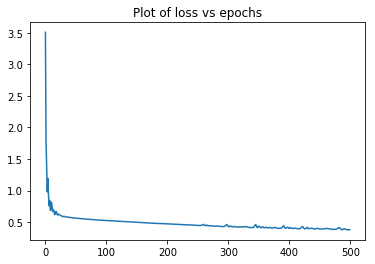

In [48]:
#  plpottiing the loss function 
ax = sns.lineplot(np.arange(500), [x.item() for x in final_losses]).set_title("Plot of loss vs epochs")


In [38]:
final_losses[0].item()

3.506957769393921

In [49]:
#predcition and confusion matrix

In [88]:
y_pred_test = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred_test.append(model(X_test[i]).argmax().item())
       

In [93]:
np.array(y_pred_test)

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [92]:
y_test

tensor([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.])

In [94]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[115,  15],
       [ 31,  31]])

Text(33.0, 0.5, 'predicted values')

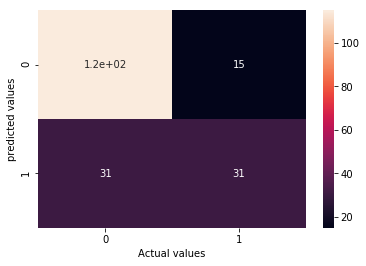

In [99]:
plt.figure()
sns.heatmap(cm, annot = True)
plt.xlabel("Actual values")
plt.ylabel("predicted values")

In [100]:
from sklearn.metrics import accuracy_score

In [103]:
score = accuracy_score(y_test , y_pred_test)
score

0.7604166666666666

In [104]:
# savving the model
torch.save(model, "diabetes.pt")

/opt/anaconda3/envs/envpytorch/lib/python3.7/site-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type ANN_Model. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [105]:
# loading the model
model_load = torch.load("./diabetes.pt")

In [106]:
model_load

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)